<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dependencies" data-toc-modified-id="Dependencies-1">Dependencies</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2">Functions</a></span></li><li><span><a href="#Paths" data-toc-modified-id="Paths-3">Paths</a></span></li><li><span><a href="#Main" data-toc-modified-id="Main-4">Main</a></span></li></ul></div>

# Dependencies

In [1]:
options(scipen = 999)

In [2]:
library(survival)
library(survminer)
library(forestmodel)

Loading required package: ggplot2

Loading required package: ggpubr



# Functions

In [3]:
source("~/OneDrive - UHN/R_src//ggplot2_theme.R")
source("~/OneDrive - UHN/R_src//color_schemes.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/IPD2/Manifests/"

# Main

In [5]:
load(file = file.path(datapath,"TME_clusters/IPD_estimate_metadata_IC.RData"))

In [6]:
table(metadata_IC$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
                90                279                393                163 

In [7]:
manifest <- read.csv(file = paste0(datapath, "HandE/HandE_Manifestfile_4Derek.csv"),
                    header = T, stringsAsFactors = F, row.names = 1)

In [8]:
scores <- read.table(file = paste0(datapath, "HandE/cbtn_til_score_summary.csv"), se = "\t",
                    header = T, stringsAsFactors = F)

In [9]:
manifest$Derekssampleid <- gsub(".svs", "",manifest$File.Name)

In [10]:
manifest$Derekssampleid <- gsub("[)]","", manifest$Derekssampleid)
manifest$Derekssampleid <- gsub("[(]","", manifest$Derekssampleid)

In [11]:
scores$sampleId <- gsub("%2528","", scores$sampleId)
scores$sampleId <- gsub("%2529","", scores$sampleId)

In [12]:
scores$sample_id <- manifest$Sample.External.ID[match(scores$sampleId, manifest$Derekssampleid)]

In [13]:
head(scores)

,sampleId,nPatch,nTissuePatch,tilScoreMean,tilScoreThresh,tilEntropyMean,sample_id
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,10454_HandE_B,58080,22744,0.07698901,0.013761871,0.3073516,7316-275
2,10457_HandE_C,67640,16176,0.15894334,0.029611771,0.5355318,7316-275
3,1230_HandE_FS,10560,793,0.03900349,0.001261034,0.1885922,7316-1461
4,1233_HandE_B,99000,17260,0.09525006,0.024913094,0.3348498,7316-1461
5,12849_HandE_A,105101,15009,0.31842333,0.265440736,0.6144974,7316-288
6,12850_HandE_A,63700,13256,0.16812727,0.061330718,0.5092051,7316-288


In [14]:
write.csv(scores, file = paste0(datapath,"forGangesh/HandE_scores_CBTN.csv"), row.names = F)

avergae scores in duplicate slides

In [18]:
scores_average

sampleId,nPatch,nTissuePatch,tilScoreMean,tilScoreThresh,tilEntropyMean,sample_id
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>


In [24]:
scores$agg_tilScore <- NA
scores_average <- scores[0,]

In [25]:
for(sample in unique(scores$sample_id)){
    tmp <- scores[ scores$sample_id == sample,]
    if(nrow(tmp) == 1){
        tmp$agg_tilScore <- tmp$tilScoreMean
        scores_average <- rbind(scores_average, tmp)
    }
    if(nrow(tmp) > 1){
        tmp$agg_tilScore[1] <- mean(tmp$tilScoreMean)
        scores_average <- rbind(scores_average, tmp[1,])        
    }
    
}

In [30]:
HE_manifest <- merge(scores_average, metadata_IC, by = "sample_id")

In [31]:
head(HE_manifest)

,sample_id,sampleId,nPatch,nTissuePatch,tilScoreMean,tilScoreThresh,tilEntropyMean,agg_tilScore,aliquot_id,StromalScore,⋯,recurrence,disease_type,primary_site,group,cohort,sample_type,age_class,tumour_subtype,CRI_cluster,immune_cluster
,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>
1,7316-10,18845_HandE,110520,60251,0.10870980,0.031435163,0.3776549,0.10870980,717108,948.222412,⋯,1,Neurofibroma/Plexiform,Spinal Cord- Lumbar/Thecal Sac,CBTN,NFB,Initial CNS Tumor,Young adults,NA,Inflammatory,Myeloid-driven
2,7316-100,18605_HandE,183600,58832,0.06401132,0.018544330,0.2395903,0.06401132,601598,2.772548,⋯,0,Craniopharyngioma,Suprasellar/Hypothalamic/Pituitary,CBTN,CPH,Initial CNS Tumor,Children,NA,Inflammatory,Myeloid-driven
3,7316-101,18609_HandE_-_BLOCK_A1,134520,42971,0.06795075,0.003607084,0.2823307,0.04271312,588338,-844.579058,⋯,0,Ganglioglioma,Temporal Lobe,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_WT,Immunologically quiet,Immune excluded
4,7316-1075,29601_HandE,183920,53314,0.06751425,0.024702705,0.2222025,0.06751425,588351,-186.469439,⋯,0,Craniopharyngioma,Suprasellar/Hypothalamic/Pituitary,CBTN,CPH,Initial CNS Tumor,NA,NA,Lymphocyte depleted,Myeloid-driven
5,7316-1077,29596_HandE,217189,87812,0.04858833,0.011251310,0.1909576,0.04858833,731885,-680.648423,⋯,0,Ganglioglioma,Occipital Lobe,CBTN,pedLGG,Initial CNS Tumor,Children,BRAF_WT,Inflammatory,Pediatric cold
6,7316-1078,29590_HandE_A1,65247,12340,0.03834332,0.003808752,0.1732243,0.03892849,588352,-823.480878,⋯,0,Ependymoma,Cerebellum/Posterior Fossa,CBTN,EPN,Initial CNS Tumor,Children,EPN_Fossa,Lymphocyte depleted,Pediatric cold


In [32]:
write.csv(HE_manifest, file = "~/Downloads/HE_manifest_4Derek.csv", row.names = F)

In [33]:
dim(HE_manifest)

[1] 434  31

In [34]:
table(HE_manifest$immune_cluster)


Pediatric inflamed     Myeloid-driven     Pediatric cold    Immune excluded 
                52                139                172                 71 

Exclude MB

In [37]:
HE_manifest <- HE_manifest[ HE_manifest$cohort != "MB",]

In [38]:
tapply(HE_manifest$tilScoreMean, HE_manifest$immune_cluster, summary)

$`Pediatric inflamed`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02152 0.06986 0.09364 0.11090 0.14262 0.24185 

$`Myeloid-driven`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007842 0.053043 0.084246 0.091664 0.114905 0.391964 

$`Pediatric cold`
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007275 0.054289 0.084521 0.112055 0.150273 0.490622 

$`Immune excluded`
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01037 0.04126 0.08598 0.11178 0.13058 0.42272 


In [39]:
tapply(HE_manifest$tilScoreMean, HE_manifest$cohort, summary)

$ATRT
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02745 0.08234 0.12455 0.17701 0.26027 0.49062 

$CP
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02935 0.06461 0.07715 0.08250 0.10065 0.16648 

$CPH
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.04833 0.06296 0.09458 0.11106 0.13182 0.24185 

$EPN
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01704 0.06146 0.08832 0.11158 0.14903 0.39740 

$ETMR
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03884 0.11966 0.20048 0.20048 0.28131 0.36213 

$MNG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0390  0.1199  0.1533  0.1617  0.1818  0.3920 

$NFB
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.06542 0.08882 0.11272 0.12342 0.13486 0.21044 

$pedHGG
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.03214 0.06416 0.10132 0.13080 0.17184 0.42938 

$pedLGG
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.007275 0.048588 0.076989 0.087989 0.115636 0.458857 

$SCHW
   Min. 1st Qu.  Median    Mean 3rd Qu.

In [43]:
pairwise.wilcox.test(HE_manifest$agg_tilScore, 
                     HE_manifest$immune_cluster,
                     p.adjust = "none")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  HE_manifest$agg_tilScore and HE_manifest$immune_cluster 

                Pediatric inflamed Myeloid-driven Pediatric cold
Myeloid-driven  0.0082             -              -             
Pediatric cold  0.1183             0.2990         -             
Immune excluded 0.1472             0.9028         0.5913        

P value adjustment method: none 

In [48]:
table(HE_manifest$primary_site)


                     Basal Ganglia        Brain Stem- Midbrain/Tectum 
                                 2                                  8 
                  Brain Stem- Pons                 Brain Stem-Medulla 
                                 5                                  1 
        Cerebellum/Posterior Fossa                 Cranial Nerves NOS 
                               112                                  2 
                      Frontal Lobe                        Hippocampus 
                                40                                  1 
                     Meninges/Dura                     Occipital Lobe 
                                 2                                 10 
                     Optic Pathway                Other locations NOS 
                                 9                                 10 
                     Parietal Lobe                              Skull 
                                14                                  1 
     

In [52]:
dim(HE_manifest[!HE_manifest$cohort %in% c("pedHGG", "ATRT"),])

[1] 319  31

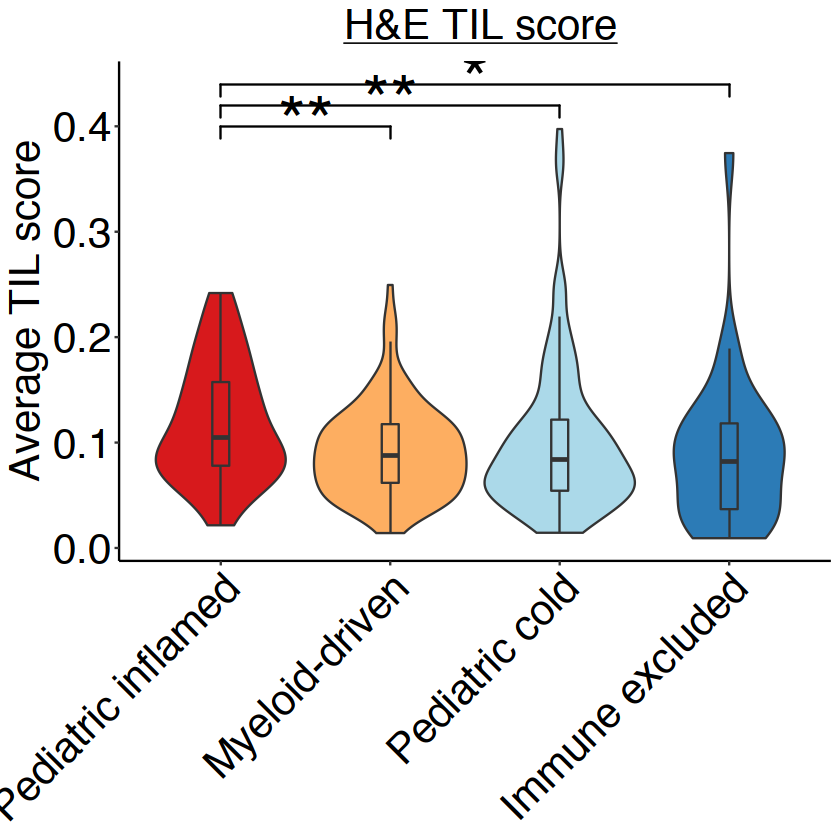

In [64]:
heplot <- ggplot(data = HE_manifest[!HE_manifest$cohort %in% c("pedHGG", "ATRT"),],
                 aes(x = immune_cluster, y = agg_tilScore, fill = immune_cluster)) + 
geom_violin() + geom_boxplot(width = 0.1, outlier.colour = NA) + 
myaxis + myplot +
scale_fill_manual(values = cluster_col) +
theme(legend.position = "none", 
      axis.title.x = element_blank(),
     plot.title = element_text(size = 25, hjust = 0.5)) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Myeloid-driven")), y_position = 0.4,
                     map_signif_level=TRUE, textsize = 15, test = "t.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Pediatric cold")), y_position = 0.42,
                     map_signif_level=TRUE, textsize = 15, test = "wilcox.test", vjust = 0.5) +
geom_signif(comparisons = list(c("Pediatric inflamed", "Immune excluded")), y_position = 0.44,
                     map_signif_level=TRUE, textsize = 15, test = "wilcox.test", vjust = 0.5) +
labs(y = "Average TIL score") + ggtitle(~underline("H&E TIL score"))

heplot

In [65]:
pdf(paste0(plotpath, "HE_vs_immuneclusters.pdf"),
   width = 10, height = 12)

print(heplot)

dev.off()

pdf 
  2